In [1]:
import pandas as pd

In [2]:
import nltk

In [3]:
from nltk.corpus import wordnet

In [4]:
import subprocess

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [8]:
from nltk.stem import WordNetLemmatizer


In [9]:
from bs4 import BeautifulSoup


In [10]:
import re

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
from sklearn.pipeline import make_pipeline


In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [15]:
from nltk.tokenize import word_tokenize


In [16]:
from nltk.corpus import stopwords


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
import seaborn as sns

In [23]:
df=pd.read_csv("SHOPEE_REVIEWS.csv")


In [24]:
df.head()

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes
0,0,The next level in buying and selling! Everyone...,5,111458*********009852,A Google user,NaN,2015-06-22T02:35:03.000Z,1
1,1,User friendly ecommerce site.,5,112264*********945160,A Google user,1.8.66,2015-06-22T02:56:13.000Z,3
2,2,This is such a cool app. I find it easy to bro...,5,109502*********169058,A Google user,1.8.66,2015-06-22T02:57:41.000Z,2
3,3,"Finally, they're here! Hooray!",5,110132*********773079,A Google user,1.8.66,2015-06-22T03:21:24.000Z,1
4,4,"Very cool app. Shop anytime, anywhere. Hassle-...",5,108961*********895535,A Google user,1.8.66,2015-06-22T08:21:15.000Z,1


In [25]:
df.shape

(782079, 8)

In [26]:
df.isnull().sum()

Unnamed: 0                  0
review_text                50
review_rating               0
author_id                   4
author_name                 0
author_app_version     185338
review_datetime_utc         0
review_likes                0
dtype: int64

In [27]:
df=df.dropna()


In [28]:
df.columns

Index(['Unnamed: 0', 'review_text', 'review_rating', 'author_id',
       'author_name', 'author_app_version', 'review_datetime_utc',
       'review_likes'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596704 entries, 1 to 782078
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           596704 non-null  int64 
 1   review_text          596704 non-null  object
 2   review_rating        596704 non-null  int64 
 3   author_id            596704 non-null  object
 4   author_name          596704 non-null  object
 5   author_app_version   596704 non-null  object
 6   review_datetime_utc  596704 non-null  object
 7   review_likes         596704 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 41.0+ MB


In [30]:
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-alphanumeric characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove emojis
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove short words
    tokens = [word for word in tokens if len(word) > 2]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [31]:
print(help(BeautifulSoup))

Help on class BeautifulSoup in module bs4:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(na

In [32]:
df.head()

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes
1,1,User friendly ecommerce site.,5,112264*********945160,A Google user,1.8.66,2015-06-22T02:56:13.000Z,3
2,2,This is such a cool app. I find it easy to bro...,5,109502*********169058,A Google user,1.8.66,2015-06-22T02:57:41.000Z,2
3,3,"Finally, they're here! Hooray!",5,110132*********773079,A Google user,1.8.66,2015-06-22T03:21:24.000Z,1
4,4,"Very cool app. Shop anytime, anywhere. Hassle-...",5,108961*********895535,A Google user,1.8.66,2015-06-22T08:21:15.000Z,1
6,6,Nice! A very convenient app for a online shopp...,5,117094*********303450,A Google user,1.8.66,2015-06-23T05:57:58.000Z,7


In [33]:
df['review_text']=df['review_text'].apply(clean_text)

C:\Users\himanshu\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [34]:
df

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes
1,1,user friendly ecommerce site,5,112264*********945160,A Google user,1.8.66,2015-06-22T02:56:13.000Z,3
2,2,cool app find easy browse might skip going mal...,5,109502*********169058,A Google user,1.8.66,2015-06-22T02:57:41.000Z,2
3,3,finally theyre hooray,5,110132*********773079,A Google user,1.8.66,2015-06-22T03:21:24.000Z,1
4,4,cool app shop anytime anywhere hasslefree buyi...,5,108961*********895535,A Google user,1.8.66,2015-06-22T08:21:15.000Z,1
6,6,nice convenient app online shopper like shop s...,5,117094*********303450,A Google user,1.8.66,2015-06-23T05:57:58.000Z,7
...,...,...,...,...,...,...,...,...
782072,782072,nice,5,109402*********648776,A Google user,3.12.18,2023-11-13T11:16:02.000Z,0
782075,782075,worse lipat kayoas priority nila seller kesa c...,1,103706*********525662,A Google user,3.12.16,2023-11-13T11:23:52.000Z,0
782076,782076,,5,110294*********214819,A Google user,3.12.16,2023-11-13T11:28:29.000Z,0
782077,782077,legit ang mga product maganda ang service than...,5,110073*********882089,A Google user,3.12.16,2023-11-13T11:30:05.000Z,0


# SENTIMENT ANALYZER

In [35]:
sia = SentimentIntensityAnalyzer()

In [36]:
df['Sentiment Scores'] = df['review_text'].apply(lambda text: sia.polarity_scores(text))

In [37]:
df

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,Sentiment Scores
1,1,user friendly ecommerce site,5,112264*********945160,A Google user,1.8.66,2015-06-22T02:56:13.000Z,3,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp..."
2,2,cool app find easy browse might skip going mal...,5,109502*********169058,A Google user,1.8.66,2015-06-22T02:57:41.000Z,2,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp..."
3,3,finally theyre hooray,5,110132*********773079,A Google user,1.8.66,2015-06-22T03:21:24.000Z,1,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp..."
4,4,cool app shop anytime anywhere hasslefree buyi...,5,108961*********895535,A Google user,1.8.66,2015-06-22T08:21:15.000Z,1,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp..."
6,6,nice convenient app online shopper like shop s...,5,117094*********303450,A Google user,1.8.66,2015-06-23T05:57:58.000Z,7,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp..."
...,...,...,...,...,...,...,...,...,...
782072,782072,nice,5,109402*********648776,A Google user,3.12.18,2023-11-13T11:16:02.000Z,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
782075,782075,worse lipat kayoas priority nila seller kesa c...,1,103706*********525662,A Google user,3.12.16,2023-11-13T11:23:52.000Z,0,"{'neg': 0.076, 'neu': 0.886, 'pos': 0.038, 'co..."
782076,782076,,5,110294*********214819,A Google user,3.12.16,2023-11-13T11:28:29.000Z,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
782077,782077,legit ang mga product maganda ang service than...,5,110073*********882089,A Google user,3.12.16,2023-11-13T11:30:05.000Z,0,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."


In [38]:
df['Compound Sentiment Score'] = df['Sentiment Scores'].apply(lambda scores: scores['compound'])


In [39]:
df

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,Sentiment Scores,Compound Sentiment Score
1,1,user friendly ecommerce site,5,112264*********945160,A Google user,1.8.66,2015-06-22T02:56:13.000Z,3,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.4939
2,2,cool app find easy browse might skip going mal...,5,109502*********169058,A Google user,1.8.66,2015-06-22T02:57:41.000Z,2,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.6369
3,3,finally theyre hooray,5,110132*********773079,A Google user,1.8.66,2015-06-22T03:21:24.000Z,1,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.5106
4,4,cool app shop anytime anywhere hasslefree buyi...,5,108961*********895535,A Google user,1.8.66,2015-06-22T08:21:15.000Z,1,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.3182
6,6,nice convenient app online shopper like shop s...,5,117094*********303450,A Google user,1.8.66,2015-06-23T05:57:58.000Z,7,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486
...,...,...,...,...,...,...,...,...,...,...
782072,782072,nice,5,109402*********648776,A Google user,3.12.18,2023-11-13T11:16:02.000Z,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215
782075,782075,worse lipat kayoas priority nila seller kesa c...,1,103706*********525662,A Google user,3.12.16,2023-11-13T11:23:52.000Z,0,"{'neg': 0.076, 'neu': 0.886, 'pos': 0.038, 'co...",-0.4215
782076,782076,,5,110294*********214819,A Google user,3.12.16,2023-11-13T11:28:29.000Z,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
782077,782077,legit ang mga product maganda ang service than...,5,110073*********882089,A Google user,3.12.16,2023-11-13T11:30:05.000Z,0,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404


In [40]:
df['pos'] = df['Sentiment Scores'].apply(lambda scores: scores['pos'])
df['neg'] = df['Sentiment Scores'].apply(lambda scores: scores['neg'])
df['neu'] = df['Sentiment Scores'].apply(lambda scores: scores['neu'])

In [41]:
df.head()

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,Sentiment Scores,Compound Sentiment Score,pos,neg,neu
1,1,user friendly ecommerce site,5,112264*********945160,A Google user,1.8.66,2015-06-22T02:56:13.000Z,3,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.4939,0.516,0.0,0.484
2,2,cool app find easy browse might skip going mal...,5,109502*********169058,A Google user,1.8.66,2015-06-22T02:57:41.000Z,2,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.6369,0.342,0.0,0.658
3,3,finally theyre hooray,5,110132*********773079,A Google user,1.8.66,2015-06-22T03:21:24.000Z,1,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.5106,0.623,0.0,0.377
4,4,cool app shop anytime anywhere hasslefree buyi...,5,108961*********895535,A Google user,1.8.66,2015-06-22T08:21:15.000Z,1,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.3182,0.247,0.0,0.753
6,6,nice convenient app online shopper like shop s...,5,117094*********303450,A Google user,1.8.66,2015-06-23T05:57:58.000Z,7,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.6486,0.325,0.0,0.675


In [42]:
X = df[['Compound Sentiment Score','pos','neg','neu']]
Y = df['review_rating']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [44]:
X_train.shape

(477363, 4)

In [45]:
X_test.shape

(119341, 4)

# RandomForestClassifier

In [46]:
rfc=RandomForestClassifier()

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred=rfc.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.7922842945844262

In [50]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

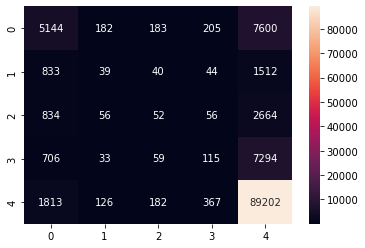

In [51]:
sns.heatmap(cm,annot=True,fmt='d')

# LogisticRegression

In [52]:
lr=LogisticRegression()


In [53]:
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred=lr.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.7900302494532474

In [56]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

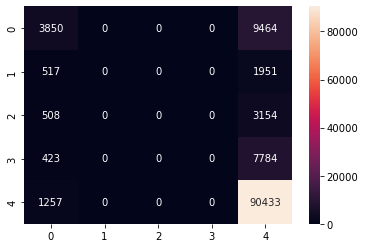

In [57]:
sns.heatmap(cm,annot=True,fmt='d')

# KNeighborsClassifier

In [58]:
knc=KNeighborsClassifier()


In [59]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred=knc.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.7808967580295121

In [62]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

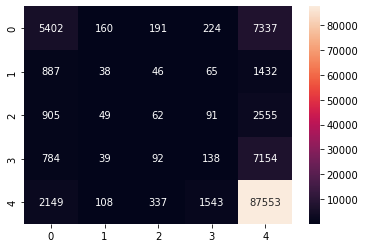

In [63]:
sns.heatmap(cm,annot=True,fmt='d')

# PassiveAggressiveClassifier

In [64]:
pac=PassiveAggressiveClassifier()


In [65]:
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [66]:
y_pred=pac.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.7442203433857602

In [68]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

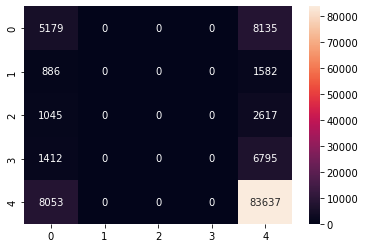

In [69]:
sns.heatmap(cm,annot=True,fmt='d')

# DecisionTreeClassifier

In [70]:
dtc=DecisionTreeClassifier()


In [71]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
y_pred=dtc.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred)

0.7849942601452979

In [74]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

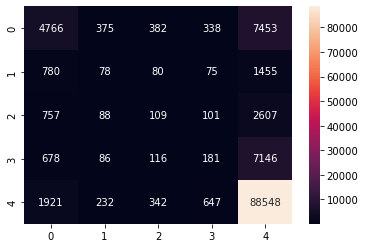

In [75]:
sns.heatmap(cm,annot=True,fmt='d')

In [76]:
X = df['review_text']  
Y = df['review_rating']

In [77]:
X

1                              user friendly ecommerce site
2         cool app find easy browse might skip going mal...
3                                     finally theyre hooray
4         cool app shop anytime anywhere hasslefree buyi...
6         nice convenient app online shopper like shop s...
                                ...                        
782072                                                 nice
782075    worse lipat kayoas priority nila seller kesa c...
782076                                                     
782077    legit ang mga product maganda ang service than...
782078                                                great
Name: review_text, Length: 596704, dtype: object

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [79]:
model = make_pipeline(TfidfVectorizer(stop_words='english'),PassiveAggressiveClassifier())

In [80]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)*100
print(f'Accuracy: {accuracy}')

Accuracy: 82.57262801551856
